# Exercise 1: Introduction to Machine Learning

Some code cells will be marked with 
```
##########################
######## To Do ###########
##########################
```

This indicates that you are being asked to write a piece of code to complete the notebook.

## Part 1: The Linear Classifier

To illustrate the workflow for training a deep learning model in a supervised manner, this notebook will walk you through the simple case of training a linear classifier to recognize images of cats and dogs. While deep learning might seem intimidating, dont worry. Its conceptual underpinnings are rooted in linear algebra and calculus - if you can perform matrix multiplication and take derivatives you can understand what is happening in a deep learning workflow.

In [1]:
import imageio
import skimage
import sklearn.model_selection
import skimage.color
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import os

## The supervised machine learning workflow
Recall from class the conceptual workflow for a supervised machine learning project. 
- First, we create a <em>training dataset</em>, a paired collection of raw data and labels where the labels contain information about the "insight" we wish to extract from the raw data. 
- Once we have training data, we can then use it to train a <em>model</em>. The model is a mathematical black box - it takes in data and transforms it into an output. The model has some parameters that we can adjust to change how it performs this mapping. 
- Adjusting these parameters to produce outputs that we want is called training the model. To do this we need two things. First, we need a notion of what we want the output to look like. This notion is captured by a <em>loss function</em>, which compares model outputs and labels and produces a score telling us if the model did a "good" job or not on our given task. By convention, low values of the loss function's output (e.g. the loss) correspond to good performance and high values to bad performance. We also need an <em>optimization algorithm</em>, which is a set of rules for how to adjust the model parameters to reduce the loss
- Using the training data, loss function, and optimization algorithm, we can then train the model 
- Once the model is trained, we need to evaluate its performance to see how well it performs and what kinds of mistakes it makes. We can also perform this kind of monitoring during training (this is actually a standard practice).

Because this workflow defines the lifecycle of most machine learning projects, this notebook is structured to go over each of these steps while constructing a linear classifier.


## Create training data
The starting point of every machine learning project is data. In this case, we will start with a collection of RGB images of cats and dogs. Each image is a multi-dimensional array with size (128, 128, 1) - the first two dimensions are spatial while the last is a channel dimension (one channel because it is a grey scale image - for an RGB image there would be 3 channels). The dataset that we are working with is a subset of [Kaggle's Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/overview). 

In [2]:
# Load data from the downloaded npz file
with np.load('cats-and-dogs-bw.npz') as f:
    X = f['X']
    y = f['y']

print(X.shape, y.shape)

(8192, 128, 128, 1) (8192,)


In the previous cell, you probably observed that there are 4 dimensions rather than the 3 you might have been expecting. This is because while each image is (128, 128, 1), the full dataset has many images. The different images are stacked along the first dimension. The full size of the training images is (# images, 128, 128, 1) - the first dimension is often called the batch dimension.

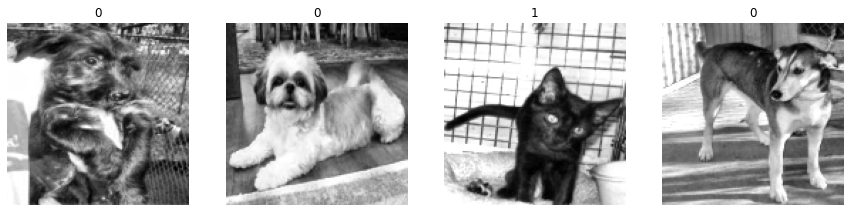

In [3]:
##########################
######## To Do ###########
##########################

# Use matplotlib to visualze several images randomly drawn from the dataset
#determine the number of images I want to visualize
number_images = 4 

#This will generate an array of number_images indexes
ixs = np.random.randint(0,X.shape[0],number_images)

fig, axs = plt.subplots(1, number_images, figsize=(15,5))

#The loop will go through the indexes in ixs array
for i in range(number_images):   
    axs[i].imshow(X[ixs[i]], cmap = 'gray')
    axs[i].axis('off')
    axs[i].set_title(y[ixs[i]])
# For each image, set the title to be the y label for the image

For this exercise, we will want to flatten the training data into a vector.

In [4]:
# Flatten the images into vectors of size (# images, 16384, 1)
X = np.reshape(X, (-1, 128*128, 1))
print(X.shape)

(8192, 16384, 1)


### Split the training dataset into training, validation, and testing datasets
How do we know how well our model is doing? A common practice to evaluate models is to evaluate them on splits of the original training dataset. Splitting the data is important, because we want to see how models perform on data that wasn't used to train them. This splitting practice usually produces 3 splits.
- The <em>training</em> dataset used to train the model
- A <em>validation </em> dataset used to evaluate the model during training. 
- A held out <em>testing</em> dataset used to evaluate the final trained version of the model
While there is no hard and fast rule, 80%, 10%, 10% splits are a reasonable starting point.

In [5]:
# Split the dataset into training, validation, and testing splits
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.75)

# The linear classifier
The linear classifier produces class scores that are a linear function of the pixel values. Mathematically, this can be written as $\vec{y} = W \vec{x}$, where $\vec{y}$ is the vector of class scores, $W$ is a matrix of weights and $\vec{x}$ is the image vector. The shape of the weights matrix is determined by the number of classes and the length of the image vector. In this case $W$ is 2 by 16384. Our learning task is to find a set of weights that maximize our performance on our classification task. We will solve this task by doing the following steps
- Randomly initializing a set of weights
- Defining a loss function that measures our performance on the classification task
- Use stochastic gradient descent to find "optimal" weights

# Create the matrix of weights
Properly initializing weights is essential for getting deep learning methods to work correctly. The two most common initialization methods you'll see in this class are [glorot uniform (also known as Xavier) initialization](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf?hc_location=ufi]) and [he initialization](http://openaccess.thecvf.com/content_iccv_2015/html/He_Delving_Deep_into_ICCV_2015_paper.html) - both papers are worth reading. For this exercise, we will randomly initialize weights by using glorot uniform initialization. In this initialization method, we sample our weights according to the formula 
\begin{equation}
W_{ij} \sim U\left[ -\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}} \right],
\end{equation}
where $n$ is the number of columns in the weight matrix (16384 in our case).

Lets create the linear classifier using object oriented programming, which will help with organization

In [6]:
class LinearClassifier(object):
    def __init__(self, image_size=16384):
        self.image_size=image_size
        
        # Initialize weights
        self._initialize_weights()
        
    def _initialize_weights(self):
        
        ##########################
        ######## To Do ###########
        ##########################
        
      
        # Randomly initialize the weights matrix acccording to the glorot uniform initialization
        W1 = np.random.uniform(-1/np.sqrt(16384),1/np.sqrt(16384),16384)
        W2 = np.random.uniform(-1/np.sqrt(16384),1/np.sqrt(16384),16384)
        self.W = np.vstack((W1,W2))
        
        pass

#lc = LinearClassifier()
#print(lc.W.shape)

#print(X.shape)

y = np.matmul(lc.W,X)
print(y.shape)

    
y = np.squeeze(y)

print(y.shape)

ye = np.exp(y)
y_sum = np.sum(y_e, axis = 1)
yp1 = ye[:,0]/y_sum
yp2 = ye[:,1]/y_sum
    
yp = np.vstack((yp1,yp2)).transpose()
print(yp)



### Apply the softmax transform to complete the model outputs
Our LinearClassifier class needs a method to perform predictions - which in our case is performing matrix multiplication and then applying the softmax transform. Recall from class that the softmax transform is given by
\begin{equation}
softmax(y_i) = \frac{e^{y_i}}{\sum_j e^{y_j}}
\end{equation}
and provides a convenient way to convert our class scores into probabilities

In [7]:
##########################
######## To Do ###########
##########################

# Complete the predict function below to predict a label y from an input X
# Pay careful attention to the shape of your data at each step

def predict(self, X, epsilon=1e-5):

    y = np.matmul(self.W,X)
    y = np.squeeze(y, axis = 2)

    #y = np.squeeze(y)

    
    ye = np.exp(y)
    y_sum = np.sum(ye, axis = 1, keepdims = True)
    y = ye/y_sum
    #yp1 = ye[:,0]/y_sum
    #yp2 = ye[:,1]/y_sum
    
    #y = np.vstack((yp1,yp2)).transpose()
    #print(y.shape)
    return y

# Assign methods to class
setattr(LinearClassifier, 'predict', predict)

Now lets see what happens when we try to predict the class of images in our training dataset using randomly initialized weights.

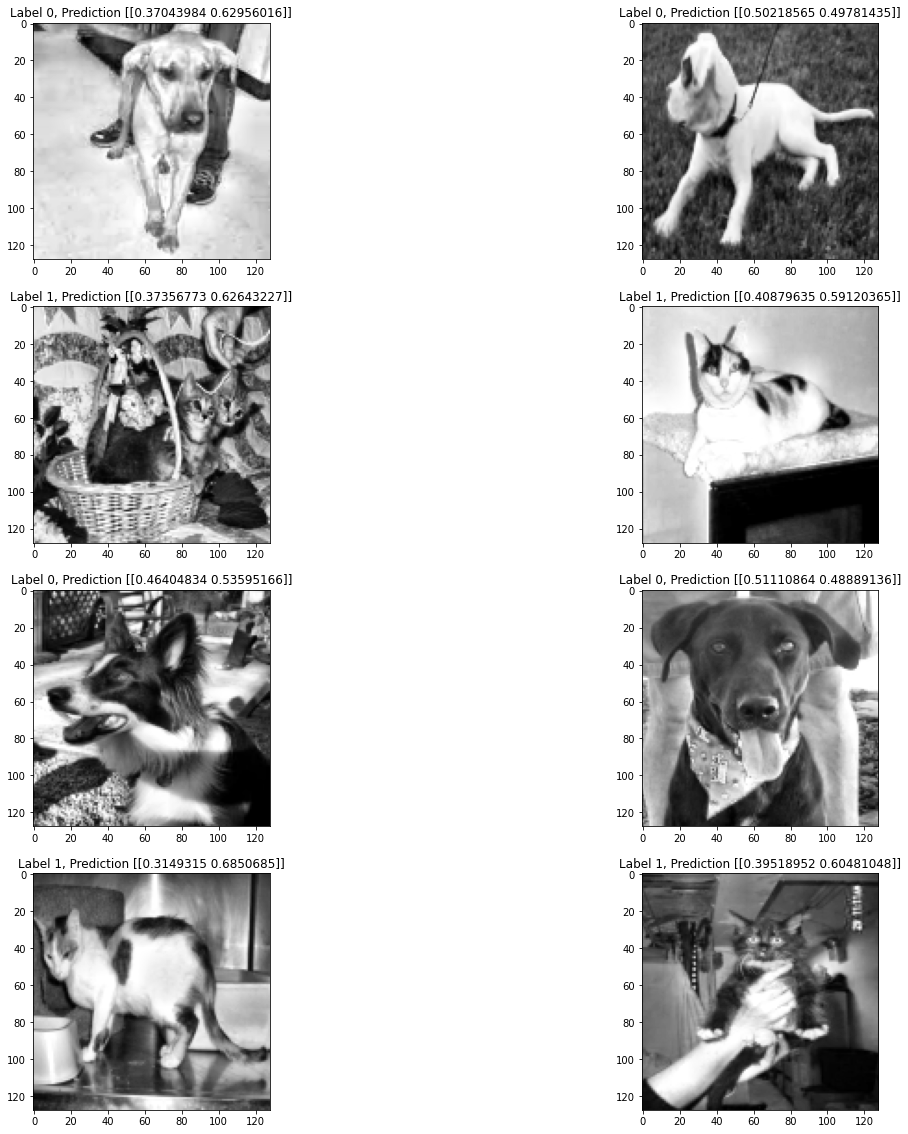

In [8]:
lc = LinearClassifier()

fig, axes = plt.subplots(4, 2, figsize=(20,20))
for i in range(8):
    
    # Get an example image
    X_sample = X[[i],...]
    
    # Reshape flattened vector to image
    X_reshape = np.reshape(X_sample, (128,128))
    
    # Predict the label
    y_pred = lc.predict(X_sample)
    
    # Display results
    axes.flatten()[i].imshow(X_reshape, cmap='gray')
    axes.flatten()[i].set_title('Label ' + str(y[i]) +', Prediction ' + str(y_pred))

What do you notice about the initial results of the model? 

## Stochastic gradient descent
To train this model, we will use stochastic gradient descent. In its simplest version, this algorithm consists of the following steps:
- Select several images from the training dataset at random
- Compute the gradient of the loss function with respect to the weights, given the selected images
- Update the weights using the update rule $\Delta W_{ij} \rightarrow \Delta W_{ij} - lr\frac{\partial loss}{\partial W_{ij}}$

Recall that the origin of this update rule is from multivariable calculus - the gradient tells us the direction in which the loss function increases the most. So to minimize the loss function we move in the opposite direction of the gradient.

Also recall from the course notes that for this problem we can compute the gradient analytically. The gradient is given by

\begin{equation}
\frac{\partial loss}{\partial W_{ij}} = \left(p_i - 1(i \mbox{ is correct}) \right)x_j,
\end{equation}
where $1$ is an indicator function that is 1 if the statement inside the parentheses is true and 0 if it is false.

In [9]:
def grad(self, X, y):
    # Get class probabilities
    p = self.predict(X)
    
    # Compute class 0 gradients
    temp_0 = np.expand_dims(p[...,0] - (1-y), axis=-1)
    grad_0 = temp_0 * X[...,0]

    # Compute class 1 gradients
    temp_1 = np.expand_dims(p[...,1] - y, axis=-1)
    grad_1 =  temp_1 * X[...,0]
    
    gradient = np.stack([grad_0, grad_1], axis=1)
    
    return gradient
    
def loss(self, X, y_true):
    y_pred = self.predict(X)
    
    # Convert y_true to one hot
    y_true = np.stack([y_true, 1-y_true], axis=-1)
    loss = np.mean(-y_true * np.log(y_pred))
    
    return loss
    
def fit(self, X_train, y_train, n_epochs, batch_size=1, learning_rate=1e-5):
    # Iterate over epochs
    for epoch in range(n_epochs):
        n_batches = np.int(np.floor(X_train.shape[0] / batch_size))
        
        # Generate random index
        index = np.arange(X_train.shape[0])
        np.random.shuffle(index)
        
        # Iterate over batches
        loss_list = []
        for batch in range(n_batches):
            beg = batch*batch_size
            end = (batch+1)*batch_size if (batch+1)*batch_size < X_train.shape[0] else -1
            X_batch = X_train[beg:end]
            y_batch = y_train[beg:end]
            
            # Compute the loss

            loss = self.loss(X_batch, y_batch)
            loss_list.append(loss)
            
            # Compute the gradient
            gradient = self.grad(X_batch, y_batch)
            
            # Compute the mean gradient over all the example images
            gradient = np.mean(gradient, axis=0, keepdims=False)

            # Update the weights
            self.W -= learning_rate * gradient
            
        return loss_list

# Assign methods to class
setattr(LinearClassifier, 'grad', grad)
setattr(LinearClassifier, 'loss', loss)
setattr(LinearClassifier, 'fit', fit)

lc = LinearClassifier()
loss = lc.fit(X_train, y_train, n_epochs=10, batch_size=16)

## Evaluate the model
Benchmarking performance is a critical part of the model development process. For this problem, we will use 3 different benchmarks
- Recall: the fraction of positive examples detected by a model. Mathematically, for a two-class classification problem, recall is calculated as (True positives)/(True positives + False negatives). 
- Precision: the percentage of positive predictions from a model that are true. Mathematically, for a two-class prediction problem, precision is calculated as (True positives)/(True positives + False positives).
- F1 score: The harmonic mean between the recall and precision

We will evaluate these metrics on both the training dataset (the examples used during training) and our testing dataset (the examples that we held out). We can also use a confusion matrix to visualize the prediction results.

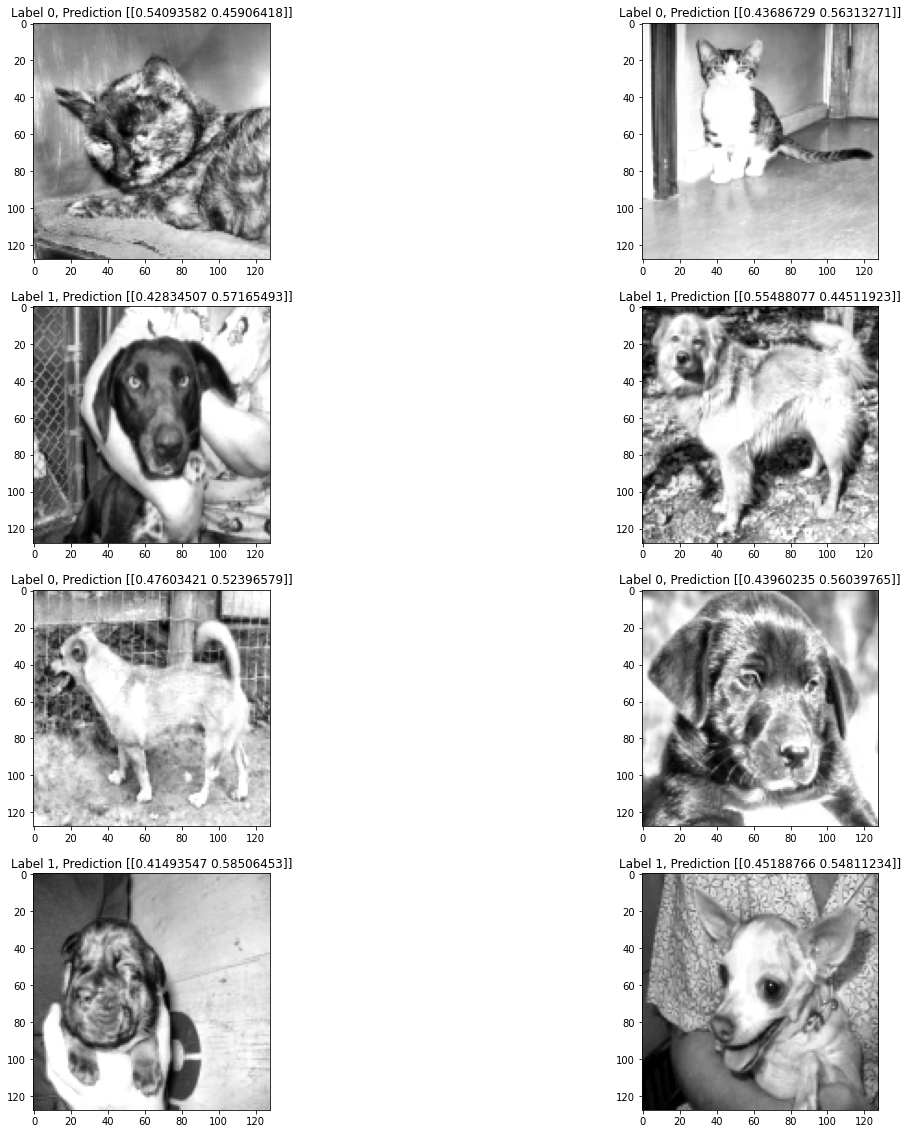

In [10]:
# Visualize some predictions

fig, axes = plt.subplots(4, 2, figsize=(20,20))
for i in range(8):
    
    # Get an example image
    X_sample = X_test[[i],...]
    
    # Reshape flattened vector to image
    X_reshape = np.reshape(X_sample, (128,128))
    
    # Predict the label
    y_pred = lc.predict(X_sample)
    
    # Display results
    axes.flatten()[i].imshow(X_reshape, cmap='gray')
    axes.flatten()[i].set_title('Label ' + str(y[i]) +', Prediction ' + str(y_pred))

In [11]:
# Generate predictions
y_pred = lc.predict(X_train)
y_pred = np.argmax(y_pred, axis=-1)

# Compute metrics
recall = sklearn.metrics.recall_score(y_train, y_pred)
precision = sklearn.metrics.precision_score(y_train, y_pred)
f1 = sklearn.metrics.f1_score(y_train, y_pred)

print('Training Recall: {}'.format(recall))
print('Training Precision: {}'.format(precision))
print('Training F1 Score: {}'.format(f1))

# Generate predictions
y_pred = lc.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

# Compute metrics
recall = sklearn.metrics.recall_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

print('Testing Recall: {}'.format(recall))
print('Testing Precision: {}'.format(precision))
print('Testing F1 Score: {}'.format(f1))


Training Recall: 0.5586793069630598
Training Precision: 0.5170953101361573
Training F1 Score: 0.53708359522313
Testing Recall: 0.5477338476374156
Testing Precision: 0.5144927536231884
Testing F1 Score: 0.5305931807566557


## Exercise
Try running your training algorithm a few times and record the results. What do you note about the overall performance? What about the differences between training runs? What about the difference in performance when evaluated on training data as opposed to validation data?

In [12]:
for i in range(100):
    # Generate predictions
    y_pred = lc.predict(X_test)
    y_pred = np.argmax(y_pred, axis=-1)

    # Compute metrics
    recall = sklearn.metrics.recall_score(y_test, y_pred)
    precision = sklearn.metrics.precision_score(y_test, y_pred)
    f1 = sklearn.metrics.f1_score(y_test, y_pred)

print('Testing Recall: {}'.format(recall))
print('Testing Precision: {}'.format(precision))
print('Testing F1 Score: {}'.format(f1))

Testing Recall: 0.5477338476374156
Testing Precision: 0.5144927536231884
Testing F1 Score: 0.5305931807566557


## Implementing a linear classifier with TensorFlow
In this section, we will define our machine learning models using TensorFlow. These models are composed of layers - each layer specifies a mathematical operation that is applied to its input. The nice thing about TensorFlow is that almost all of the machinery required for stochastic gradient descent is taken care of for us.
- Specify trainable variables? Check.
- Initialize trainable variables with random values? Check.
- Compute the layer outputs? Check.
- Compute gradients using backpropagation? Check.
- Perform all of the computations on GPUs to speed up training and inference? Check.
All of the above (and more) are taken care of for us by TensorFlow - writing models often requires little math (although one practice that I encourage is keeping track of the input and output dimensions for each layer).

To define a linear classifier, we will use a module in TensorFlow called Keras. Keras simple APIs for specifying models. In Keras, there are two different APIs you can use:
- [Sequential API](https://www.tensorflow.org/guide/keras/sequential_model) - If your model is composed of a linear sequence of steps, this is the easier API to use.
- [Functional API](https://www.tensorflow.org/guide/keras/functional) - If your model is more complicated, this API provides more flexibility. If you're using the functional API, consider using a class with methods to write submodels.
The TensorFlow documentation provides additional details about how to use each of these two APIs.

In [17]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
        
import tensorflow_addons as tfa

from tensorflow.keras.layers import Input, Flatten, Dense, Activation, BatchNormalization, Conv2D, MaxPool2D, Softmax
from tensorflow.keras import Model
from tensorflow.keras.utils import plot_model

## Create dataset object
TensorFlow uses Dataset objects to feed data into the training pipeline. These objects were covered in more detail in the TensorFlow Dataset notebook. In this section, we will make a class that builds a dataset object and applies random augmentation operation (e.g. rotation, flipping, scaling).

In [18]:
# Load data from the downloaded npz file
with np.load('cats-and-dogs-bw.npz') as f:
    X = f['X']
    y = f['y']

print(X.shape, y.shape)

(8192, 128, 128, 1) (8192,)


In [19]:
# Create dataset builder
class DatasetBuilder(object):
    def __init__(self,
                 X,
                 y,
                 batch_size=1,
                 rotation_range=180,
                 scale_range=(0.75, 1.25)):
        self.X = X
        self.y = tf.keras.utils.to_categorical(y)
        
        self.batch_size = batch_size
        self.rotation_range = np.float(rotation_range)
        self.scale_range = scale_range
        
        # Create dataset
        self._create_dataset()
        
    def _augment(self, *args):
        img = args[0]
        label = args[1]
        
        theta = tf.random.uniform([1], 0, 2*np.pi*self.rotation_range/360)
        img = tfa.image.rotate(img, theta)
        img = tf.image.random_flip_left_right(img)
        img = tf.image.random_flip_up_down(img)
        
        return (img, label)
        
    def _create_dataset(self):
        X_train, X_temp, y_train, y_temp = sklearn.model_selection.train_test_split(self.X, self.y, train_size=0.8)
        X_val, X_test, y_val, y_test = sklearn.model_selection.train_test_split(X_temp, y_temp, train_size=0.5)
        
        train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
        test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
        
        self.train_dataset = train_dataset.shuffle(256).batch(self.batch_size).map(self._augment)
        self.val_dataset = val_dataset.batch(self.batch_size)
        self.test_dataset = test_dataset.batch(self.batch_size)

In [20]:
db = DatasetBuilder(X, y, batch_size=64)

2021-09-26 21:01:02.740962: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2021-09-26 20:56:31.330983: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(64, 128, 128, 1)


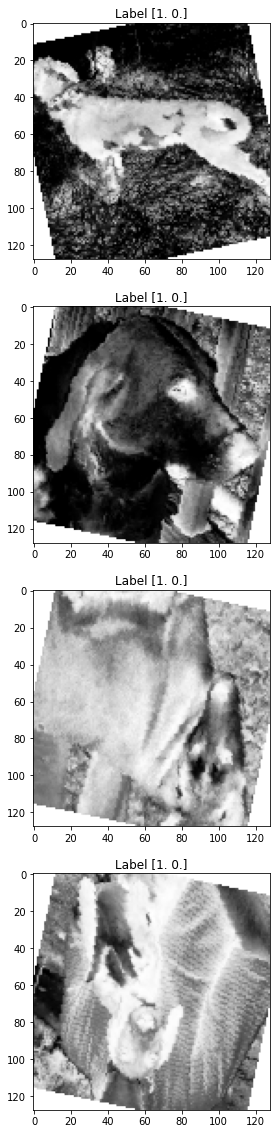

In [18]:
# Check the data augmentation
it = db.train_dataset.as_numpy_iterator()
X_temp, y_temp = it.next()
print(X_temp.shape)

fig, axes = plt.subplots(4, figsize=(20,20))
for i in range(4):
    axes.flatten()[i].imshow(X_temp[i,...,:], cmap='Greys')
    axes.flatten()[i].set_title('Label ' + str(y_temp[i]))

### Define the model

In [19]:
# Define the linear classifier
def create_linear_classifier():
    inputs = Input((X.shape[1], X.shape[2], 1),
                   name='linear_classifier_input')
    x = Flatten()(inputs)
    x = Dense(2)(x)
    x = Softmax(axis=-1)(x)
    model = Model(inputs=inputs, outputs=x)
    return model

linear_classifier = create_linear_classifier()

## Specify training parameters 
In this section, we will specify how we want to train the neural network. We will need to specify three things:
- The loss function. Because we are training a model for classification, we will use the categorical crossentropy
- The training algorithm. There are many flavors of stochastic gradient descent - for this problem, we will use a variant called Adam
- The training parameters. The training algorithm needs parameters like the learning rate, number of epochs, number of steps per epoch, etc. to be specified

In [20]:
# Define the loss function
loss_function = tf.keras.losses.CategoricalCrossentropy() 

In [56]:
# Define the training algorithm
linear_optimizer = tf.keras.optimizers.Adam(lr=1e-3, clipnorm=0.001)
fc_optimizer = tf.keras.optimizers.Adam(lr=1e-3, clipnorm=0.001)
conv_optimizer = tf.keras.optimizers.Adam(lr=1e-3, clipnorm=0.001)

/Users/morganschwartz/opt/anaconda3/envs/mbl/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [64]:
# Define training parameters
training_steps_per_epoch=512
n_epochs=32

# Define callbacks
linear_model_path = 'linear'

linear_callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        linear_model_path, monitor='val_loss',
        save_best_only=True, verbose=1,
        save_weights_only=False)
]

linear_callbacks.append(
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, verbose=1,
        patience=3, min_lr=1e-7)
)

# Define metrics
recall_0 = tf.keras.metrics.Recall(class_id=0)
recall_1 = tf.keras.metrics.Recall(class_id=1)

precision_0 = tf.keras.metrics.Precision(class_id=0)
precision_1 = tf.keras.metrics.Precision(class_id=1)

In [65]:
# Compile models
linear_classifier.compile(optimizer=linear_optimizer, 
                          loss=loss_function, 
                          metrics = [recall_0, recall_1, precision_0, precision_1])

## Train the model
With the dataset, model, and training parameters defined, it is straightforward to train a model. Keras Model objects have a fit method that takes in the training parameters and executes the training algorithm.

In [66]:
# Train the linear classifier
linear_classifier.fit(db.train_dataset,
                      validation_data=db.val_dataset,
                      epochs=n_epochs,
                      verbose=1,
                      callbacks=linear_callbacks)

Epoch 1/32
103/103 [==============================] - 6s 51ms/step - loss: 1.4838 - recall_2: 0.4837 - recall_3: 0.5053 - precision_2: 0.4906 - precision_3: 0.4984 - val_loss: 3.1010 - val_recall_2: 1.0000 - val_recall_3: 0.0000e+00 - val_precision_2: 0.5263 - val_precision_3: 0.0000e+00

Epoch 00001: val_loss improved from inf to 3.10095, saving model to linear
INFO:tensorflow:Assets written to: linear/assets
Epoch 2/32
103/103 [==============================] - 5s 50ms/step - loss: 1.2828 - recall_2: 0.5185 - recall_3: 0.4989 - precision_2: 0.5048 - precision_3: 0.5126 - val_loss: 0.8967 - val_recall_2: 0.7517 - val_recall_3: 0.2758 - val_precision_2: 0.5355 - val_precision_3: 0.5000

Epoch 00002: val_loss improved from 3.10095 to 0.89667, saving model to linear
INFO:tensorflow:Assets written to: linear/assets
Epoch 3/32
103/103 [==============================] - 5s 49ms/step - loss: 1.2482 - recall_2: 0.5117 - recall_3: 0.4859 - precision_2: 0.4951 - precision_3: 0.5025 - val_loss: 

## Benchmark the model
In this section, we will benchmark each model to assess the performance.

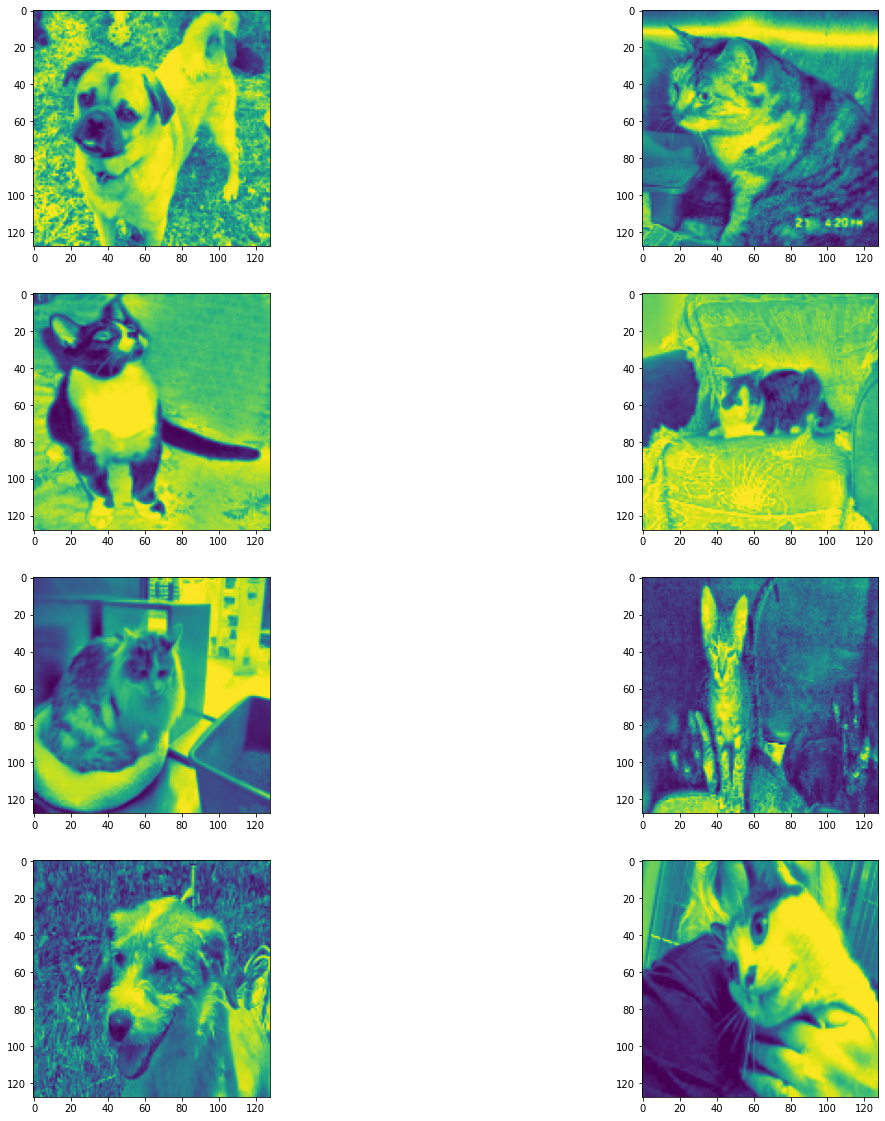

In [69]:
# Visualize some predictions
it = db.test_dataset.as_numpy_iterator()

fig, axes = plt.subplots(4, 2, figsize=(20,20))
for i in range(8):
    X_test, y_test = it.next()
    
    # Get an example image
    X_sample = X_test[[i],...]
    
    # Predict the label
    y_pred_linear = linear_classifier.predict(X_sample)
    
    # Display results
    axes.flatten()[i].imshow(X_sample[0])

In [70]:
# Generate predictions
test_list = list(db.test_dataset.as_numpy_iterator())
X_test = [item[0] for item in test_list]
y_test = [item[1] for item in test_list]

X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
y_test = np.argmax(y_test, axis=-1)

# Compute linear classifier metrics
y_pred = linear_classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)

recall = sklearn.metrics.recall_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

print('Linear Recall: {}'.format(recall))
print('Linear Precision: {}'.format(precision))
print('Linear F1 Score: {}'.format(f1))

Linear Recall: 0.8796068796068796
Linear Precision: 0.499302649930265
Linear F1 Score: 0.6370106761565836
